# Pet Classification Model Using CNN.
Project 3 

## DESCRIPTION

### Project Objective:


Build a CNN model that classifies the given pet images correctly into dog and cat images. 
The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and non-functional requirements for the project, it also serves as an input for project scoping. 


### Project Description and Scope: 


You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.

You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data. 


### Project Guidelines:


Begin by creating the ipynb file in the same parent folder where the downloaded data set is kept. The CNN model should have the following layers: 

● Input layer .

● Convolutional layer 1 with 32 filters of kernel size[5,5] .

● Pooling layer 1 with pool size[2,2] and stride 2 .

● Convolutional layer 2 with 64 filters of kernel size[5,5] .

● Pooling layer 2 with pool size[2,2] and stride 2 .

● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 .

● Dropout layer with dropout probability 0.4 .

### Predict the class by doing a softmax on the output of the dropout layers. .
### This should be followed by training and evaluation: .

● For the training step, define the loss function and minimize it .

● For the evaluation step, calculate the accuracy .

### Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data. 

Prerequisites:


To execute this project, please ensure you have the latest version of TensorFlow installed on your system.

## Setting input data using input data genrator

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
data=ImageDataGenerator()
train_path='data/train'
test_path='data/test'

In [3]:
x_train,y_train=next(data.flow_from_directory(train_path,target_size=(90,90),batch_size=40))

Found 40 images belonging to 2 classes.


In [4]:
x_test,y_test=next(data.flow_from_directory(test_path,target_size=(90,90)))

Found 20 images belonging to 2 classes.


In [5]:
#Cheaking the length of the data
len(y_train),len(y_test)

(40, 20)

In [6]:
#Cheaking Train Data
y_train[22]

array([1., 0.], dtype=float32)

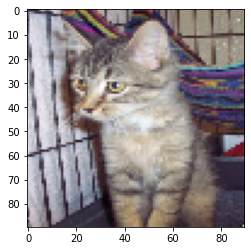

In [7]:
plt.imshow(x_train[22].astype('uint8'))

In [8]:
y_train[1]

array([1., 0.], dtype=float32)

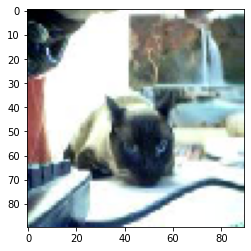

In [9]:
plt.imshow(x_train[1].astype('uint8'))

In [10]:
#Cheaking Test data
y_test[5]

array([0., 1.], dtype=float32)

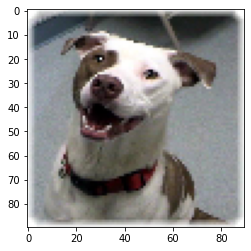

In [11]:
plt.imshow(x_test[5].astype('uint8'))

In [12]:
#Coverting data type to float32

### As now the data is generated now we can procced to model buliding stage

In [13]:
#importing Required Library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,MaxPool2D,Dense,Dropout,Conv2D,Flatten

In [14]:
#initiating Sequential model object and adding layers
fc_size=32
model= Sequential()
model.add(InputLayer(input_shape=(90,90,3),dtype='float64'))
model.add(Conv2D(32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(units=fc_size,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2,activation='softmax'))

In [15]:
#Compiling the model with adam optimizer and categorical CrossEntropy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 86, 86, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 39, 39, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                739360    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

### Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data. 

In [17]:
# with 100 Epochs or Iterations
history100=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,verbose=True)

Epoch 1/100
2/2 [==============================] - 6s 2s/step - loss: 36.2776 - accuracy: 0.5875 - val_loss: 136.2468 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 2s 804ms/step - loss: 115.3041 - accuracy: 0.4833 - val_loss: 11.3669 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 2s 835ms/step - loss: 14.8509 - accuracy: 0.4625 - val_loss: 0.9388 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 2s 787ms/step - loss: 0.8173 - accuracy: 0.6042 - val_loss: 0.7133 - val_accuracy: 0.5500
Epoch 5/100
2/2 [==============================] - 2s 821ms/step - loss: 1.0903 - accuracy: 0.4896 - val_loss: 0.6817 - val_accuracy: 0.7000
Epoch 6/100
2/2 [==============================] - 2s 786ms/step - loss: 0.7506 - accuracy: 0.6417 - val_loss: 0.7770 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 2s 863ms/step - loss: 0.7074 - accuracy: 0.6250 - val_loss: 0.7079 - val_accuracy: 0.4500
Epoch 8/1

Epoch 59/100
2/2 [==============================] - 2s 779ms/step - loss: 0.3616 - accuracy: 0.8375 - val_loss: 1.0234 - val_accuracy: 0.5000
Epoch 60/100
2/2 [==============================] - 2s 839ms/step - loss: 0.3702 - accuracy: 0.8104 - val_loss: 1.2427 - val_accuracy: 0.5000
Epoch 61/100
2/2 [==============================] - 2s 817ms/step - loss: 0.2353 - accuracy: 0.8312 - val_loss: 1.3976 - val_accuracy: 0.7000
Epoch 62/100
2/2 [==============================] - 2s 824ms/step - loss: 0.3304 - accuracy: 0.8750 - val_loss: 1.6407 - val_accuracy: 0.5000
Epoch 63/100
2/2 [==============================] - 2s 793ms/step - loss: 0.2497 - accuracy: 0.8750 - val_loss: 1.4620 - val_accuracy: 0.5500
Epoch 64/100
2/2 [==============================] - 2s 835ms/step - loss: 0.3207 - accuracy: 0.8958 - val_loss: 1.4330 - val_accuracy: 0.5500
Epoch 65/100
2/2 [==============================] - 2s 767ms/step - loss: 0.3157 - accuracy: 0.9188 - val_loss: 1.4153 - val_accuracy: 0.6000
Epoch 

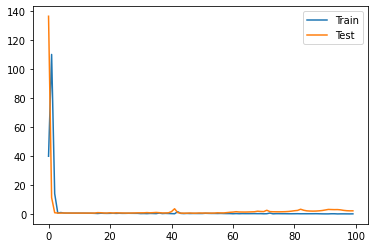

In [18]:
plt.plot(history100.history['loss'],label='Train')
plt.plot(history100.history['val_loss'],label='Test')
plt.legend()
plt.show()

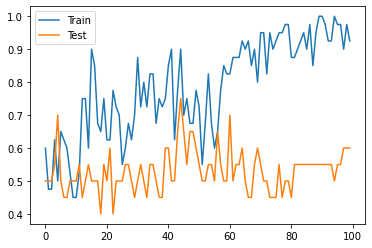

In [19]:
plt.plot(history100.history['accuracy'],label='Train')
plt.plot(history100.history['val_accuracy'],label='Test')
plt.legend()
plt.show()

In [20]:
# with 100 Epochs or Iterations
history200=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,verbose=True)

Epoch 1/200
2/2 [==============================] - 2s 852ms/step - loss: 0.1818 - accuracy: 0.9750 - val_loss: 2.3118 - val_accuracy: 0.6000
Epoch 2/200
2/2 [==============================] - 2s 746ms/step - loss: 0.1373 - accuracy: 0.9750 - val_loss: 2.4034 - val_accuracy: 0.5500
Epoch 3/200
2/2 [==============================] - 2s 832ms/step - loss: 0.1630 - accuracy: 0.9750 - val_loss: 2.5668 - val_accuracy: 0.5500
Epoch 4/200
2/2 [==============================] - 2s 805ms/step - loss: 0.1866 - accuracy: 0.9250 - val_loss: 2.8339 - val_accuracy: 0.5500
Epoch 5/200
2/2 [==============================] - 2s 800ms/step - loss: 0.2460 - accuracy: 0.9000 - val_loss: 2.8254 - val_accuracy: 0.5500
Epoch 6/200
2/2 [==============================] - 2s 794ms/step - loss: 0.2677 - accuracy: 0.9250 - val_loss: 2.6259 - val_accuracy: 0.5500
Epoch 7/200
2/2 [==============================] - 2s 852ms/step - loss: 0.1495 - accuracy: 0.9750 - val_loss: 2.5012 - val_accuracy: 0.5500
Epoch 8/200
2

Epoch 59/200
2/2 [==============================] - 3s 939ms/step - loss: 0.1996 - accuracy: 0.9500 - val_loss: 2.3805 - val_accuracy: 0.6000
Epoch 60/200
2/2 [==============================] - 2s 829ms/step - loss: 0.1875 - accuracy: 0.9000 - val_loss: 2.4475 - val_accuracy: 0.6000
Epoch 61/200
2/2 [==============================] - 2s 842ms/step - loss: 0.1464 - accuracy: 1.0000 - val_loss: 2.5488 - val_accuracy: 0.6000
Epoch 62/200
2/2 [==============================] - 2s 812ms/step - loss: 0.2270 - accuracy: 0.9000 - val_loss: 2.6614 - val_accuracy: 0.6000
Epoch 63/200
2/2 [==============================] - 2s 822ms/step - loss: 0.1360 - accuracy: 0.9750 - val_loss: 2.7768 - val_accuracy: 0.6000
Epoch 64/200
2/2 [==============================] - 2s 795ms/step - loss: 0.2341 - accuracy: 0.8750 - val_loss: 2.8836 - val_accuracy: 0.6000
Epoch 65/200
2/2 [==============================] - 2s 856ms/step - loss: 0.1697 - accuracy: 0.9500 - val_loss: 2.9821 - val_accuracy: 0.6000
Epoch 

Epoch 117/200
2/2 [==============================] - 3s 942ms/step - loss: 0.1166 - accuracy: 0.9750 - val_loss: 3.0011 - val_accuracy: 0.6500
Epoch 118/200
2/2 [==============================] - 3s 950ms/step - loss: 0.1287 - accuracy: 1.0000 - val_loss: 3.0906 - val_accuracy: 0.6000
Epoch 119/200
2/2 [==============================] - 3s 932ms/step - loss: 0.1247 - accuracy: 0.9750 - val_loss: 3.3444 - val_accuracy: 0.6500
Epoch 120/200
2/2 [==============================] - 3s 879ms/step - loss: 0.1836 - accuracy: 0.9250 - val_loss: 2.9214 - val_accuracy: 0.6000
Epoch 121/200
2/2 [==============================] - 3s 900ms/step - loss: 0.1151 - accuracy: 1.0000 - val_loss: 2.6279 - val_accuracy: 0.5500
Epoch 122/200
2/2 [==============================] - 2s 925ms/step - loss: 0.1414 - accuracy: 0.9750 - val_loss: 2.0045 - val_accuracy: 0.6000
Epoch 123/200
2/2 [==============================] - 2s 953ms/step - loss: 0.1326 - accuracy: 0.9750 - val_loss: 1.6466 - val_accuracy: 0.7000

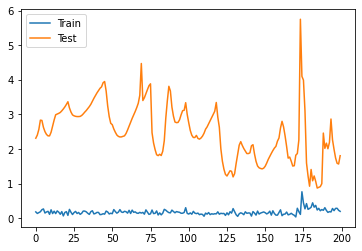

In [21]:
plt.plot(history200.history['loss'],label='Train')
plt.plot(history200.history['val_loss'],label='Test')
plt.legend()
plt.show()

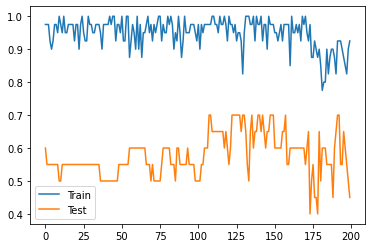

In [22]:
plt.plot(history200.history['accuracy'],label='Train')
plt.plot(history200.history['val_accuracy'],label='Test')
plt.legend()
plt.show()

In [23]:
# with 300 Epochs or Iterations
history300=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=300,verbose=True)

Epoch 1/300
2/2 [==============================] - 2s 848ms/step - loss: 0.2469 - accuracy: 0.8750 - val_loss: 1.8497 - val_accuracy: 0.5000
Epoch 2/300
2/2 [==============================] - 2s 809ms/step - loss: 0.2960 - accuracy: 0.8500 - val_loss: 1.2784 - val_accuracy: 0.5500
Epoch 3/300
2/2 [==============================] - 2s 813ms/step - loss: 0.1896 - accuracy: 0.8750 - val_loss: 0.9803 - val_accuracy: 0.6000
Epoch 4/300
2/2 [==============================] - 2s 799ms/step - loss: 0.1504 - accuracy: 0.9250 - val_loss: 0.9491 - val_accuracy: 0.6500
Epoch 5/300
2/2 [==============================] - 2s 749ms/step - loss: 0.1545 - accuracy: 0.9500 - val_loss: 0.9520 - val_accuracy: 0.6000
Epoch 6/300
2/2 [==============================] - 2s 793ms/step - loss: 0.1614 - accuracy: 0.9000 - val_loss: 1.6307 - val_accuracy: 0.6000
Epoch 7/300
2/2 [==============================] - 2s 811ms/step - loss: 0.3582 - accuracy: 0.9000 - val_loss: 1.4337 - val_accuracy: 0.7500
Epoch 8/300
2

Epoch 59/300
2/2 [==============================] - 2s 777ms/step - loss: 0.4521 - accuracy: 0.7750 - val_loss: 1.3171 - val_accuracy: 0.6000
Epoch 60/300
2/2 [==============================] - 2s 970ms/step - loss: 0.4263 - accuracy: 0.8000 - val_loss: 1.3270 - val_accuracy: 0.6000
Epoch 61/300
2/2 [==============================] - 2s 810ms/step - loss: 0.3738 - accuracy: 0.8500 - val_loss: 1.3435 - val_accuracy: 0.6000
Epoch 62/300
2/2 [==============================] - 2s 805ms/step - loss: 0.4780 - accuracy: 0.7500 - val_loss: 1.3593 - val_accuracy: 0.6000
Epoch 63/300
2/2 [==============================] - 2s 813ms/step - loss: 0.5042 - accuracy: 0.7250 - val_loss: 1.3742 - val_accuracy: 0.6000
Epoch 64/300
2/2 [==============================] - 2s 774ms/step - loss: 0.3205 - accuracy: 0.9000 - val_loss: 1.3881 - val_accuracy: 0.6000
Epoch 65/300
2/2 [==============================] - 2s 792ms/step - loss: 0.4255 - accuracy: 0.8000 - val_loss: 1.4051 - val_accuracy: 0.6000
Epoch 

Epoch 117/300
2/2 [==============================] - 2s 780ms/step - loss: 0.4224 - accuracy: 0.8000 - val_loss: 1.8208 - val_accuracy: 0.5500
Epoch 118/300
2/2 [==============================] - 2s 800ms/step - loss: 0.3673 - accuracy: 0.8500 - val_loss: 1.8232 - val_accuracy: 0.5500
Epoch 119/300
2/2 [==============================] - 2s 760ms/step - loss: 0.4223 - accuracy: 0.8000 - val_loss: 1.8254 - val_accuracy: 0.5500
Epoch 120/300
2/2 [==============================] - 2s 781ms/step - loss: 0.3947 - accuracy: 0.8250 - val_loss: 1.8277 - val_accuracy: 0.5500
Epoch 121/300
2/2 [==============================] - 2s 763ms/step - loss: 0.3670 - accuracy: 0.8500 - val_loss: 1.8303 - val_accuracy: 0.5500
Epoch 122/300
2/2 [==============================] - 2s 819ms/step - loss: 0.4498 - accuracy: 0.7750 - val_loss: 1.8327 - val_accuracy: 0.5500
Epoch 123/300
2/2 [==============================] - 2s 786ms/step - loss: 0.3944 - accuracy: 0.8250 - val_loss: 1.8348 - val_accuracy: 0.5500

Epoch 233/300
2/2 [==============================] - 2s 828ms/step - loss: 0.4787 - accuracy: 0.7500 - val_loss: 1.9983 - val_accuracy: 0.5500
Epoch 234/300
2/2 [==============================] - 2s 791ms/step - loss: 0.4195 - accuracy: 0.8000 - val_loss: 1.9994 - val_accuracy: 0.5500
Epoch 235/300
2/2 [==============================] - 2s 849ms/step - loss: 0.4194 - accuracy: 0.8000 - val_loss: 2.0007 - val_accuracy: 0.5500
Epoch 236/300
2/2 [==============================] - 2s 753ms/step - loss: 0.3601 - accuracy: 0.8500 - val_loss: 2.0019 - val_accuracy: 0.5500
Epoch 237/300
2/2 [==============================] - 2s 779ms/step - loss: 0.3898 - accuracy: 0.8250 - val_loss: 2.0033 - val_accuracy: 0.5500
Epoch 238/300
2/2 [==============================] - 2s 782ms/step - loss: 0.3304 - accuracy: 0.8750 - val_loss: 2.0045 - val_accuracy: 0.5500
Epoch 239/300
2/2 [==============================] - 2s 805ms/step - loss: 0.4491 - accuracy: 0.7750 - val_loss: 2.0055 - val_accuracy: 0.5500

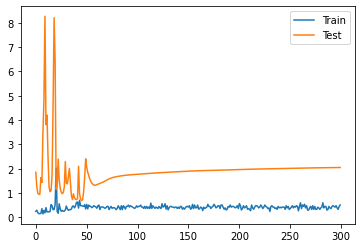

In [24]:
plt.plot(history300.history['loss'],label='Train')
plt.plot(history300.history['val_loss'],label='Test')
plt.legend()
plt.show()

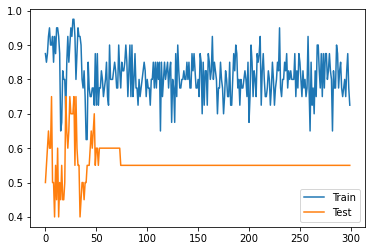

In [25]:
plt.plot(history300.history['accuracy'],label='Train')
plt.plot(history300.history['val_accuracy'],label='Test')
plt.legend()
plt.show()

### Hence this is the required model and its can perform even better with more layers. Also we can see there is a overfitting case at 50th epoch also the highest accuracy is 75%.